<a href="https://colab.research.google.com/github/Luisperezzg/PythonExercises_1/blob/main/Copy_of_PIA_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kaggle API library
!pip install kaggle

# Kaggle API key (kaggle.json)
from google.colab import files

# Upload the kaggle.json file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
import os

# Moving the uploaded key to the required location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download the skin lesion dataset
!kaggle datasets download -d wanderdust/skin-lesion-analysis-toward-melanoma-detection

100% 11.3G/11.3G [02:11<00:00, 176MB/s]
100% 11.3G/11.3G [02:11<00:00, 92.4MB/s]


In [ ]:
import zipfile

# Unzip the downloaded dataset
with zipfile.ZipFile('/content/skin-lesion-analysis-toward-melanoma-detection.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/skin-lesion-dataset')


In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import sklearn.model_selection
import pandas as pd
import numpy as np
import glob
from PIL import Image
from tensorflow.data import Dataset
import tensorflow.io as tfio


**Preprocessing**

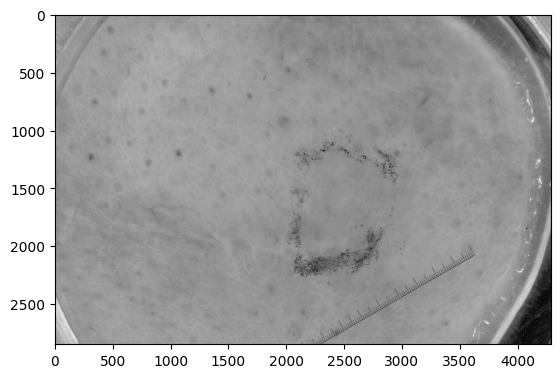

In [ ]:
# Load images
file = '/content/skin-lesion-dataset/skin-lesions/test/melanoma/ISIC_0012258.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )

# Image preview
plt.imshow(test_image, cmap='gray')

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Paths to the dataset
data_train_path = '/content/skin-lesion-dataset/skin-lesions/train'
data_valid_path = '/content/skin-lesion-dataset/skin-lesions/valid'
data_test_path = '/content/skin-lesion-dataset/skin-lesions/test'

# Load and preprocess images
def load_and_preprocess_data(data_path):
    classes = ['melanoma', 'nevus', 'seborrheic_keratosis']
    images = []
    labels = []

    for label in classes:
        label_path = os.path.join(data_path, label)
        if os.path.exists(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img, (28, 28))
                img_resized = cv2.bitwise_not(img_resized)  # Invert the image
                images.append(img_resized)
                labels.append(classes.index(label))  # Use index as label (0, 1, 2)

    return np.array(images), np.array(labels)

# Load and preprocess training data
train_images, train_labels = load_and_preprocess_data(data_train_path)

# Load and preprocess validation data
valid_images, valid_labels = load_and_preprocess_data(data_valid_path)

# Load and preprocess test data
test_images, test_labels = load_and_preprocess_data(data_test_path)

# Normalization of pixel values
train_images = train_images / 255.0
valid_images = valid_images / 255.0
test_images = test_images / 255.0


Structure and training of Convolutional Artificial Neural Network (CNN)

In [ ]:
# Convolutional part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Learning part
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # Assuming 3 classes (melanoma, nevus, seborrheic_keratosis)

# Model Compilation: Features
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# CNN training
history = model.fit(train_images.reshape(-1, 28, 28, 1), train_labels, epochs=10,
                    validation_data=(valid_images.reshape(-1, 28, 28, 1), valid_labels))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 8s 67ms/step - loss: 0.8547 - accuracy: 0.6795 - val_loss: 1.0623 - val_accuracy: 0.5200
Epoch 2/10
63/63 [==============================] - 2s 31ms/step - loss: 0.8300 - accuracy: 0.6860 - val_loss: 1.0407 - val_accuracy: 0.5200
Epoch 3/10
63/63 [==============================] - 2s 26ms/step - loss: 0.8097 - accuracy: 0.6860 - val_loss: 1.0172 - val_accuracy: 0.5200
Epoch 4/10
63/63 [==============================] - 2s 29ms/step - loss: 0.7914 - accuracy: 0.6860 - val_loss: 1.0364 - val_accuracy: 0.5200
Epoch 5/10
63/63 [==============================] - 3s 43ms/step - loss: 0.7850 - accuracy: 0.6860 - val_loss: 1.0442 - val_accuracy: 0.5200
Epoch 6/10
63/63 [==============================] - 2s 34ms/step - loss: 0.7587 - accuracy: 0.6915 - val_loss: 0.9639 - val_accuracy: 0.5667
Epoch 7/10
63/63 [==============================] - 2s 26ms/step - loss: 0.7371 - accuracy: 0.7025 - val_loss: 0.9548 - val_accuracy: 0.5667
Epoch 8/10
63/63 [======

CNN Accuracy Results

19/19 - 0s - loss: 0.7589 - accuracy: 0.6900 - 160ms/epoch - 8ms/step

Test Accuracy: 0.6899999976158142


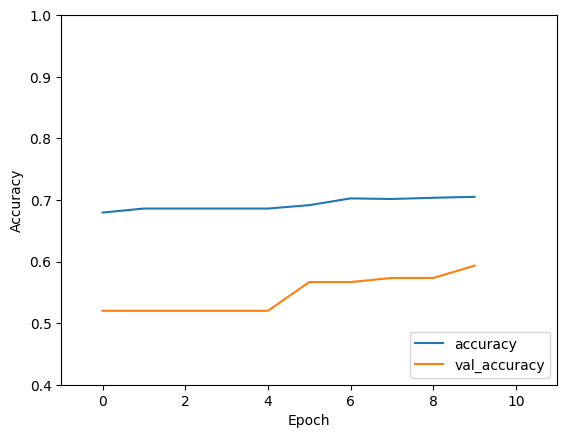

In [ ]:
# Plot with the difference in accuracy values from training and validation.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images.reshape(-1, 28, 28, 1), test_labels, verbose=2)

# Display test accuracy
print(f"\nTest Accuracy: {test_acc}")


Predictions with the trained CNN (At least 5 predictions)

In [ ]:
# Generate predictions for the test set
predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# Function to get the class label from the prediction probabilities
def get_class_label(prediction):
    return classes[np.argmax(prediction)]

# Display predictions for at least 5 images
for i in range(5):
    index = np.random.randint(len(test_images))  # Randomly select an index from the test set
    prediction = predictions[index]
    true_label = classes[test_labels[index]]

    predicted_label = get_class_label(prediction)

    print(f"Prediction for image {index}:")
    print(f"The network predicts the image is class {predicted_label}, and the true class is {true_label}\n")


19/19 [==============================] - 0s 9ms/step
Prediction for image 545:
The network predicts the image is class nevus, and the true class is seborrheic_keratosis

Prediction for image 15:
The network predicts the image is class nevus, and the true class is melanoma

Prediction for image 226:
The network predicts the image is class nevus, and the true class is nevus

Prediction for image 538:
The network predicts the image is class seborrheic_keratosis, and the true class is seborrheic_keratosis

Prediction for image 138:
The network predicts the image is class nevus, and the true class is nevus




t-SNE visualization plot: provides a visual representation of the clustering of images based on the model predictions. Its particularly useful for understanding how well the model generalizes to different classes and whether it exhibits clear distinctions between them.

19/19 [==============================] - 0s 21ms/step


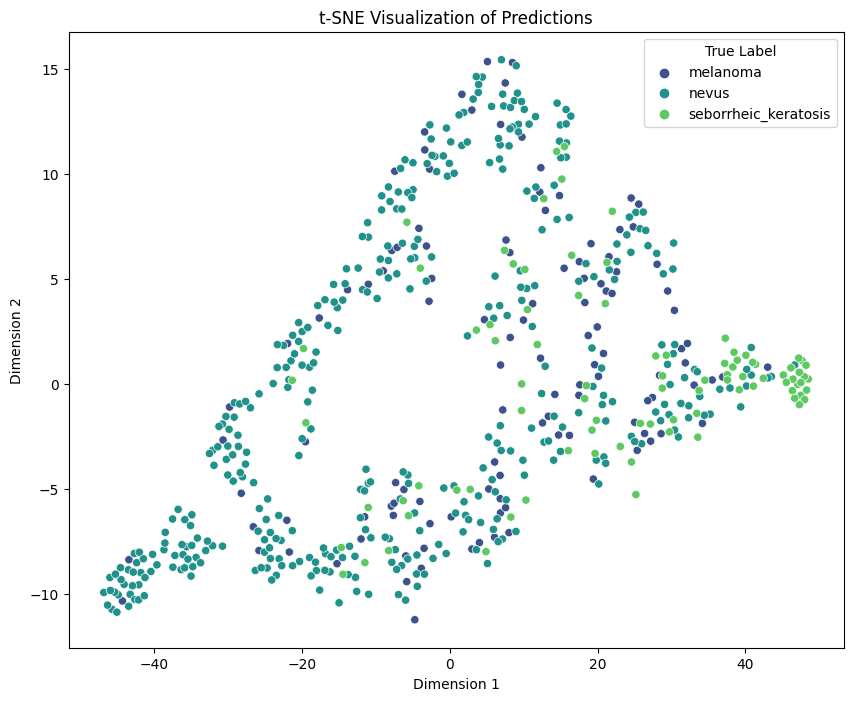

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd

# Generate predictions for the entire test set
all_predictions = model.predict(test_images.reshape(-1, 28, 28, 1))

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(all_predictions)

# Create a DataFrame with the t-SNE results and true labels
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['True Label'] = [classes[label] for label in test_labels]

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='True Label', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Predictions')
plt.show()
